In [2]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_socio = pd.read_csv('data/socio_demo.csv')

In [5]:
df_socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354584 entries, 0 to 1354583
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1354584 non-null  object
 1   breed        1354584 non-null  object
 2   age          1354584 non-null  object
 3   income       1354584 non-null  object
dtypes: object(4)
memory usage: 41.3+ MB


In [6]:
df_socio.head()

,customer_id,breed,age,income
0,rezLh5Hae3m6flaxM4,Purebred,[25-35[,[120-200K$[
1,resWkHpEcL1IUfdoBp,Purebred,[25-35[,[80-120K$[
2,re9qxF7kS9R2LwOVVY,Purebred,[35-45[,[80-120K$[
3,re3IZNYZY6xr8OAE56,Purebred,[55-65[,[40-80K$[
4,re01lnV2DfgMLdfIF7,Purebred,[65+[,[80-120K$[


In [7]:
for col in df_socio.columns:
    print(f"\n📌 Unique values in '{col}':")
    print(df_socio[col].unique())



📌 Unique values in 'customer_id':
['rezLh5Hae3m6flaxM4' 'resWkHpEcL1IUfdoBp' 're9qxF7kS9R2LwOVVY' ...
 'reHJlTYbsdyhpQPXzg' 're0dRkGLDObofTjJNj' 'reAwDA5MSjXhPteWq2']

📌 Unique values in 'breed':
['Purebred' 'Mixed-breed']

📌 Unique values in 'age':
['[25-35[' '[35-45[' '[55-65[' '[65+[' '[18-25[' '[45-55[']

📌 Unique values in 'income':
['[120-200K$[' '[80-120K$[' '[40-80K$[' '[200K$+[' '[0-40K$[']


C:\Users\nouts\AppData\Local\Temp\ipykernel_55800\1437739482.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\nouts\AppData\Local\Temp\ipykernel_55800\1437739482.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\nouts\AppData\Local\Temp\ipykernel_55800\1437739482.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


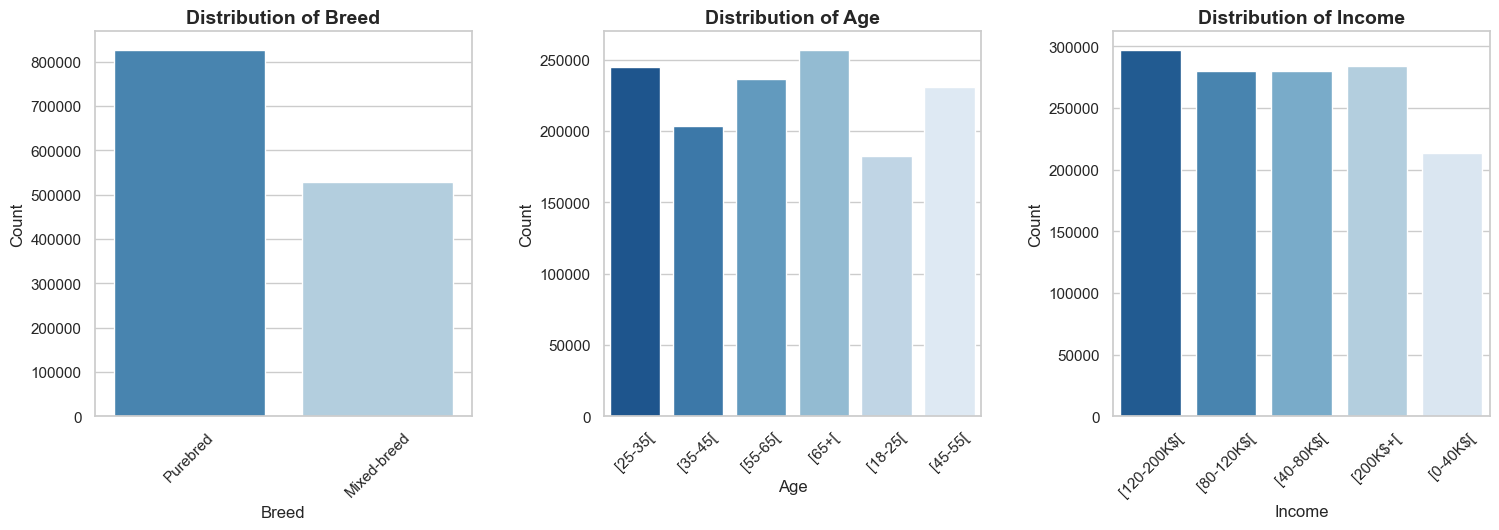

In [9]:
sns.set_theme(style="whitegrid")

# Select all columns except customer_id
cols = [col for col in df_socio.columns if col != "customer_id"]

# Create one subplot per variable
fig, axes = plt.subplots(1, len(cols), figsize=(6 * len(cols), 5))

# Allow single-axis case
if len(cols) == 1:
    axes = [axes]

# Add space between plots
plt.subplots_adjust(wspace=0.35)

for ax, col in zip(axes, cols):
    sns.countplot(
        data=df_socio,
        x=col,
        palette="Blues_r",
        ax=ax
    )
    
    ax.set_title(f"Distribution of {col.capitalize()}", fontsize=14, weight="bold")
    ax.set_xlabel(col.capitalize(), fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.show()


C:\Users\nouts\AppData\Local\Temp\ipykernel_55800\2416246289.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\nouts\AppData\Local\Temp\ipykernel_55800\2416246289.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\nouts\AppData\Local\Temp\ipykernel_55800\2416246289.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


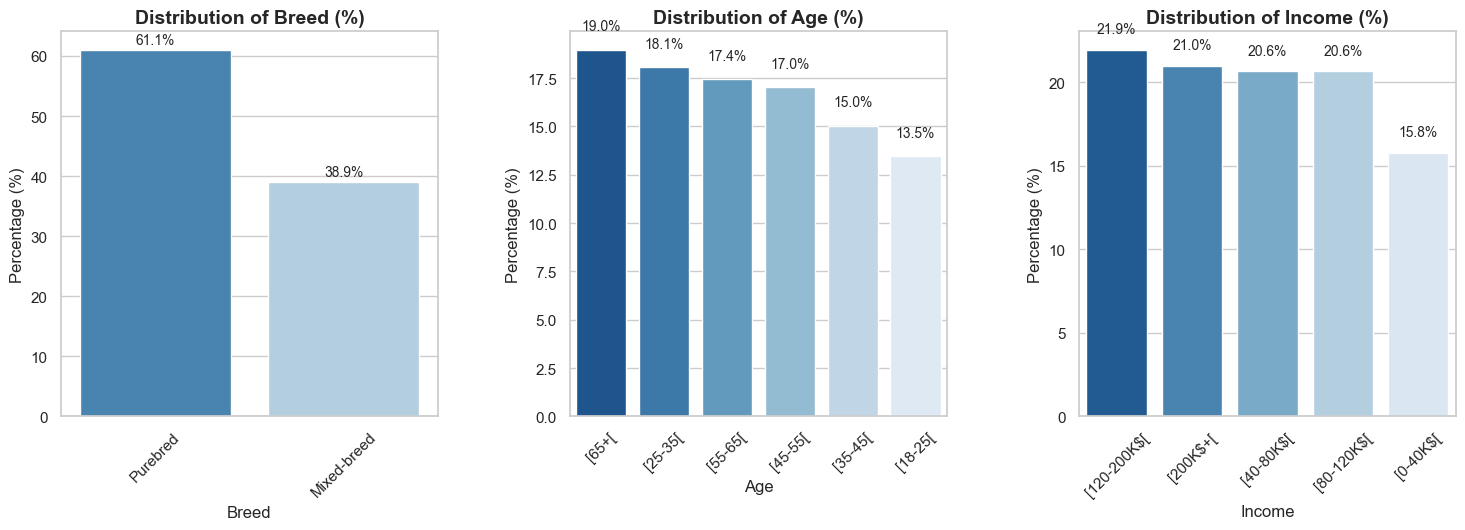

In [10]:
sns.set_theme(style="whitegrid")

# Select all columns except customer_id
cols = [col for col in df_socio.columns if col != "customer_id"]

fig, axes = plt.subplots(1, len(cols), figsize=(6 * len(cols), 5))
plt.subplots_adjust(wspace=0.35)

if len(cols) == 1:
    axes = [axes]

for ax, col in zip(axes, cols):
    
    # Compute percentage distribution
    pct = (
        df_socio[col]
        .value_counts(normalize=True) * 100
    )
    
    # Plot barplot
    sns.barplot(
        x=pct.index,
        y=pct.values,
        palette="Blues_r",
        ax=ax
    )
    
    ax.set_title(f"Distribution of {col.capitalize()} (%)", fontsize=14, weight="bold")
    ax.set_xlabel(col.capitalize(), fontsize=12)
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    # Add % labels above bars
    for i, v in enumerate(pct.values):
        ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

plt.show()
